In [47]:
from keras.datasets  import cifar10
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [25]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [26]:
x_train.shape

(50000, 32, 32, 3)

#### Visualize

In [10]:
y_train[2]

array([9], dtype=uint8)

In [27]:
class_names = ['airplane', 'automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck']

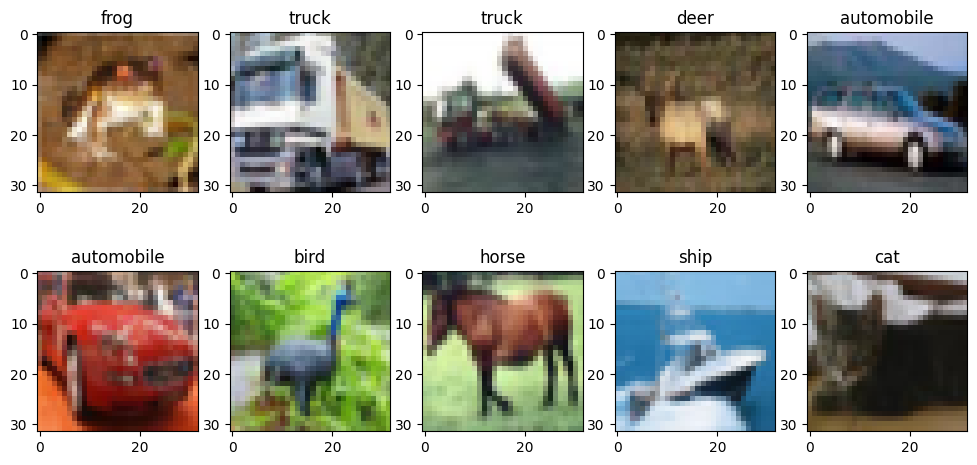

In [28]:
plt.figure(figsize=(12,15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
plt.show()

#### Prepare dataset

In [29]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)
x_train = x_train.reshape(-1,32,32,3).astype('float')/255 # Rows, Columns, Channels
x_test = x_test.reshape(-1,32,32,3).astype('float')/255 # Rows, Columns, Channels

In [16]:
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
x_train[0].shape

(32, 32, 3)

#### Model Building

In [40]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Activation, MaxPool2D, Flatten, Input, Dropout
from keras.optimizers import RMSprop, Adam

In [41]:
model = Sequential()
model.add(Conv2D(filters=10, kernel_size = (3,3), strides = (1,1)))
model.add(Activation('relu')) # 28x28
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1))) # 14x14

model.add(Conv2D(filters=10, kernel_size = (3,3), strides = (1,1)))
model.add(Activation('relu')) # 28x28

model.add(Flatten())
# model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax')) # output

In [42]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [43]:
model.fit(x=x_train,
         y=y_train_ohe,
         batch_size=1000,
         validation_data=(x_test, y_test_ohe),
         epochs = 10)

Epoch 1/10
50/50 [==============================] - 16s 313ms/step - loss: 18.1008 - accuracy: 0.1262 - val_loss: 2.3916 - val_accuracy: 0.1328
Epoch 2/10
50/50 [==============================] - 17s 331ms/step - loss: 2.2635 - accuracy: 0.1763 - val_loss: 2.2038 - val_accuracy: 0.2061
Epoch 3/10
50/50 [==============================] - 17s 336ms/step - loss: 2.0890 - accuracy: 0.2481 - val_loss: 2.0512 - val_accuracy: 0.2905
Epoch 4/10
50/50 [==============================] - 15s 292ms/step - loss: 1.8751 - accuracy: 0.3299 - val_loss: 1.9788 - val_accuracy: 0.3036
Epoch 5/10
50/50 [==============================] - 15s 306ms/step - loss: 1.7610 - accuracy: 0.3746 - val_loss: 1.9175 - val_accuracy: 0.3203
Epoch 6/10
50/50 [==============================] - 15s 294ms/step - loss: 1.6922 - accuracy: 0.3982 - val_loss: 1.9005 - val_accuracy: 0.3301
Epoch 7/10
50/50 [==============================] - 15s 290ms/step - loss: 1.6424 - accuracy: 0.4159 - val_loss: 1.9038 - val_accuracy: 0.333

In [44]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

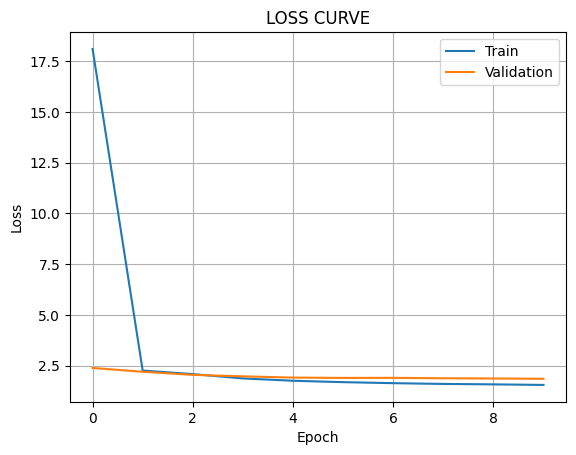

In [45]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

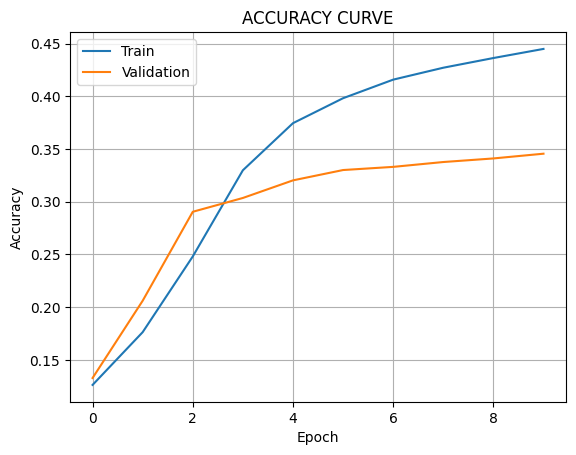

In [46]:
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()